In [32]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns
import tensorflow as tf
#import edward as ed
import pymc3 as pm

In [9]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

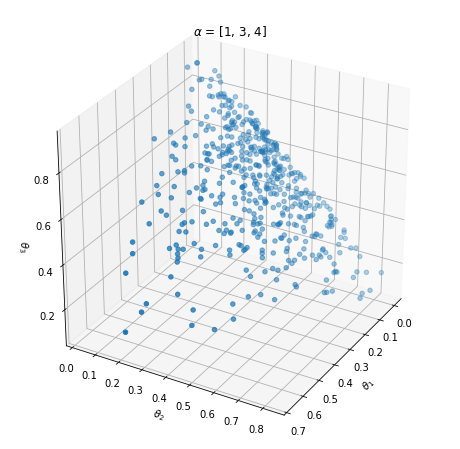

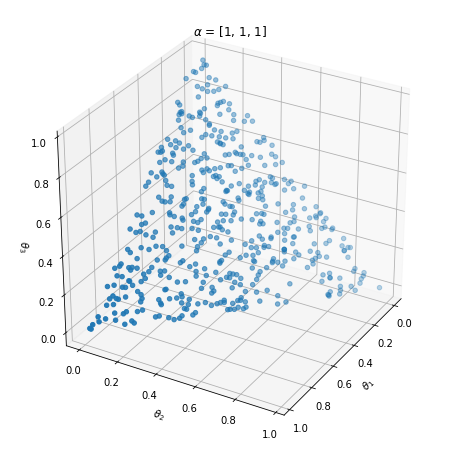

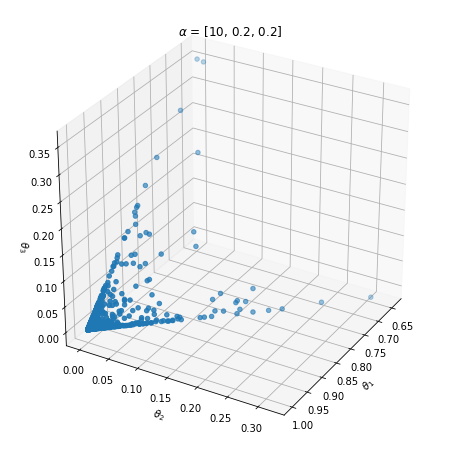

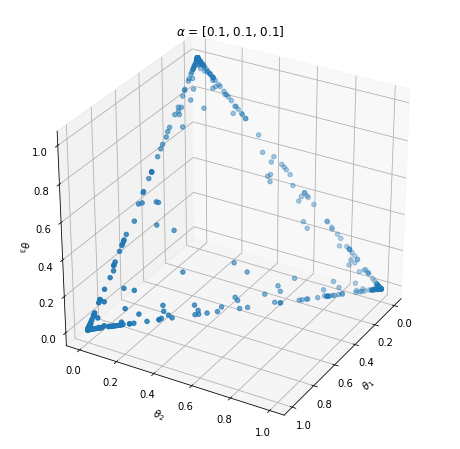

In [3]:
for alpha in [[1, 3, 4], [1, 1, 1], [10, 0.2, 0.2], [0.1, 0.1, 0.1]]:
    theta = stats.dirichlet(alpha).rvs(500)

    fig = plt.figure(figsize=(8, 8))
    ax = plt.gca(projection='3d')
    plt.title(r'$\alpha$ = {}'.format(alpha))
    ax.scatter(theta[:, 0], theta[:, 1], theta[:, 2])
    ax.view_init(azim=30)
    ax.set_xlabel(r'$\theta_1$')
    ax.set_ylabel(r'$\theta_2$')
    ax.set_zlabel(r'$\theta_3$')
    plt.show()

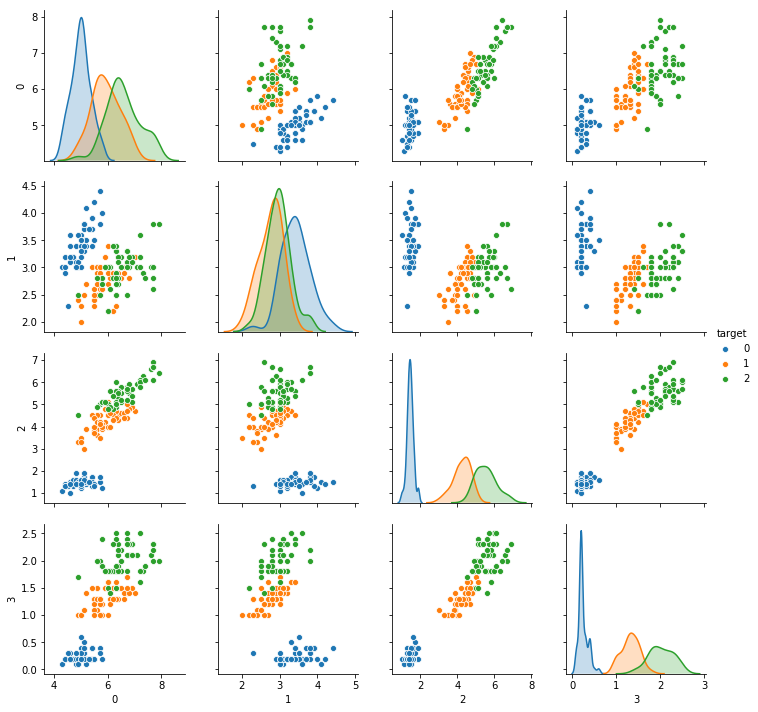

In [6]:
df = pd.DataFrame(load_iris()['data'])
y = df.values
# Standardize the data
y = (y - y.mean(axis=0)) / y.std(axis=0)

# A 2D pairplot between variables
df['target'] = load_iris()['target']
sns.pairplot(df, hue='target', vars=[0, 1, 2, 3])

In [40]:
df[0][df['target'] == 1]

50    7.0
51    6.4
52    6.9
53    5.5
54    6.5
55    5.7
56    6.3
57    4.9
58    6.6
59    5.2
60    5.0
61    5.9
62    6.0
63    6.1
64    5.6
65    6.7
66    5.6
67    5.8
68    6.2
69    5.6
70    5.9
71    6.1
72    6.3
73    6.1
74    6.4
75    6.6
76    6.8
77    6.7
78    6.0
79    5.7
80    5.5
81    5.5
82    5.8
83    6.0
84    5.4
85    6.0
86    6.7
87    6.3
88    5.6
89    5.5
90    5.5
91    6.1
92    5.8
93    5.0
94    5.6
95    5.7
96    5.7
97    6.2
98    5.1
99    5.7
Name: 0, dtype: float64

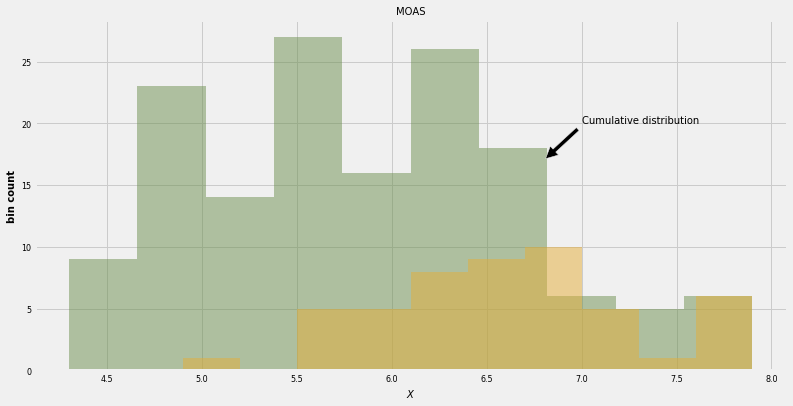

In [41]:
plt.figure(figsize=(12, 6))
#b = 8
a = 1

plt.title('MOAS')
plt.xlabel(r'$X$')
plt.ylabel('bin count')
plt.annotate('Cumulative distribution', (6.8, 17), (7, 20), arrowprops=dict(facecolor='black', shrink=0.05))
plt.hist(df[0], color=colors[3], rwidth=a, alpha=.5)
plt.hist(df[0][df['target'] == 2], color=colors[2], rwidth=a, alpha=.5)
#plt.hist(df[0][df['target'] == 1], color=colors[1], rwidth=a, alpha=.5)
#plt.hist(df[0][df['target'] == 0], color=colors[0], rwidth=a, alpha=.5)
plt.show()

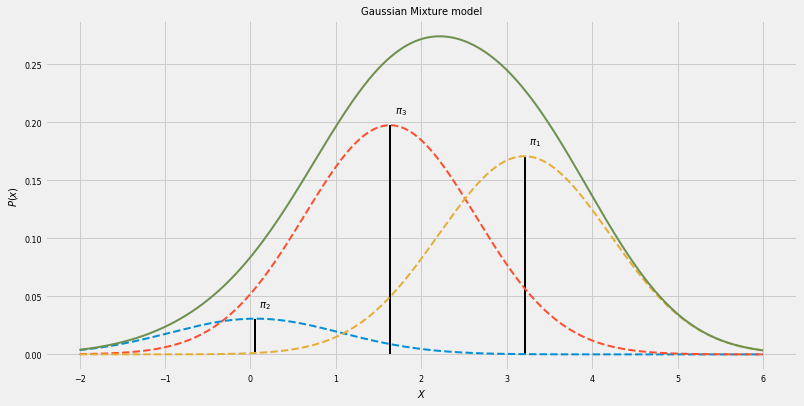

In [26]:
np.random.seed(13)
x = np.linspace(-2, 6, 500)
pi = stats.dirichlet([1, 1, 1]).rvs()[0]
mu = stats.norm(1, 1).rvs(3)

y = stats.norm(mu, np.ones(3)).pdf(x[:, None])
plt.figure(figsize=(12, 6))
plt.title('Gaussian Mixture model')
plt.ylabel(r'$P(x)$')
plt.xlabel(r'$X$')

plt.plot(x, y[:, 1] * pi[1], ls='--')
plt.plot(x, y[:, 2] * pi[2], ls='--')
plt.plot(x, y[:, 0] * pi[0], ls='--')

for i in range(3):
    xi = x[np.argmax(y[:, i])]
    yi = (y[:, i] * pi[i]).max()
    plt.vlines(xi, 0, yi)
    plt.text(xi + 0.05, yi + 0.01, r'$\pi_{}$'.format(i + 1))
plt.plot(x, (y * pi).sum(1))
plt.show()

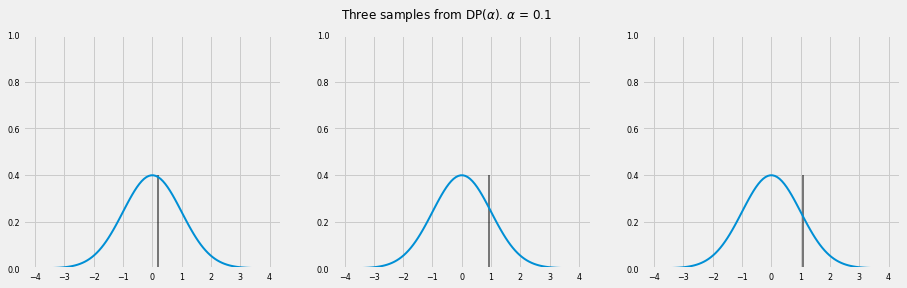

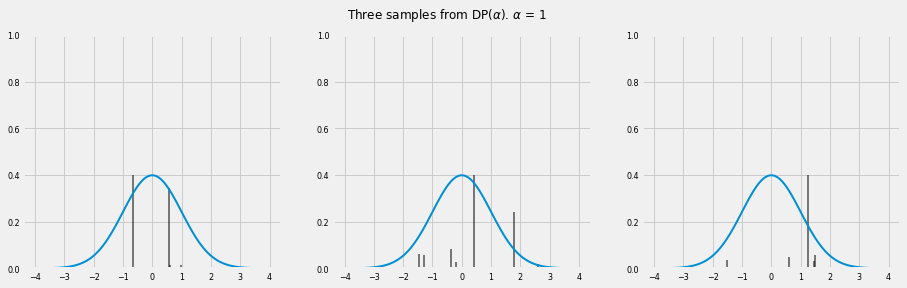

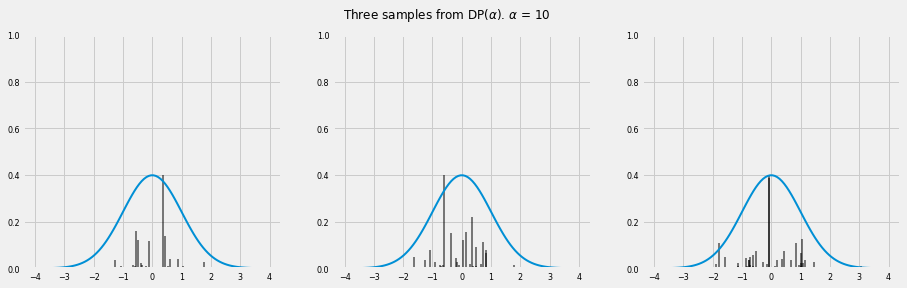

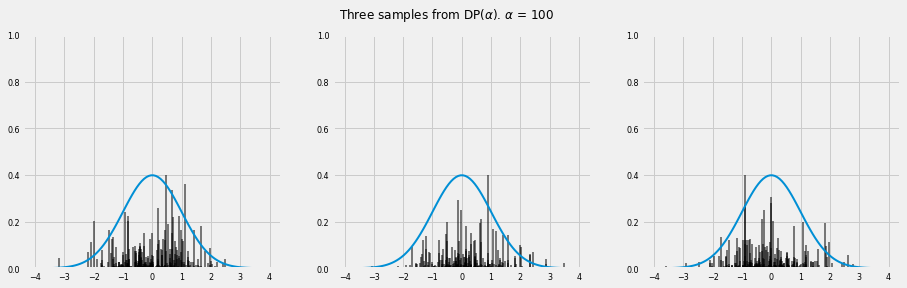

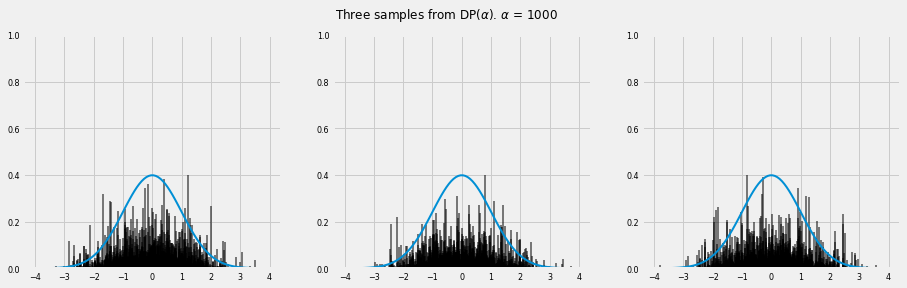

In [27]:
def dirichlet_process(h_0, alpha):
    """
    Truncated dirichlet process.
    :param h_0: (scipy distribution)
    :param alpha: (flt)
    :param n: (int) Truncate value.
    """
    n = max(int(5 * alpha + 2), 500)  # truncate the values. 
    pi = stats.beta(1, alpha).rvs(size=n)
    pi[1:] = pi[1:] * (1 - pi[:-1]).cumprod()  # stick breaking process
    theta = h_0(size=n)  # samples from original distribution
    return pi, theta
        
def plot_normal_dp_approximation(alpha, n=3):
    pi, theta = dirichlet_process(stats.norm.rvs, alpha)
    x = np.linspace(-4, 4, 100)
    
    plt.figure(figsize=(14, 4))
    plt.suptitle(r'Three samples from DP($\alpha$). $\alpha$ = {}'.format(alpha))
    plt.ylabel(r'$\pi$')
    plt.xlabel(r'$\theta$')
    pltcount = int('1' + str(n) + '0')
    
    for i in range(n):
        pltcount += 1
        plt.subplot(pltcount)
        pi, theta = dirichlet_process(stats.norm.rvs, alpha)
        pi = pi * (stats.norm.pdf(0) / pi.max())
        plt.vlines(theta, 0, pi, alpha=0.5)
        plt.ylim(0, 1)
        plt.plot(x, stats.norm.pdf(x))

np.random.seed(65)
for alpha in [.1, 1, 10, 100, 1000]:
    plot_normal_dp_approximation(alpha)

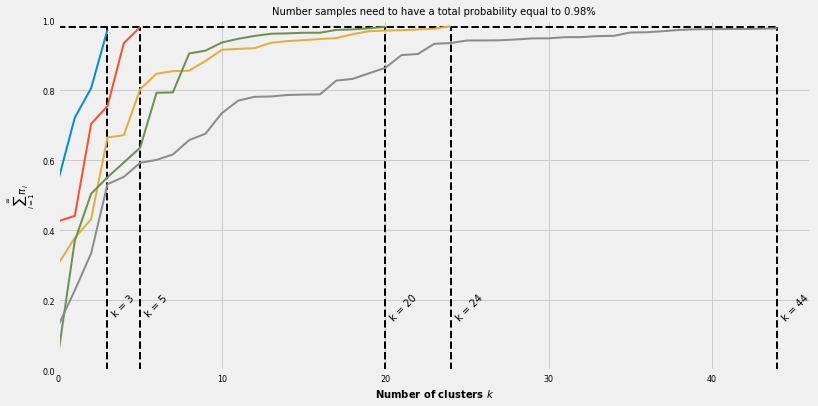

In [28]:
np.random.seed(95)

acceptance_p = 0.98
plt.figure(figsize=(12, 6))
plt.title(f'Number samples need to have a total probability equal to {acceptance_p}%')
plt.ylabel('$\sum_{i=1}^{\infty}{\pi_i}$')
plt.xlabel('Number of clusters $k$')
def plot_summation(alpha):
    pi, _ = dirichlet_process(stats.norm.rvs, alpha)
    p_total = np.cumsum(pi)
    i = np.argmin(np.abs(p_total - acceptance_p))
    plt.plot(np.arange(pi[:i + 1].shape[0]), p_total[:i + 1])
    return i

k = 0
for alpha in [1, 2, 5, 7, 10]:
    k_i = plot_summation(alpha)
    k = max(k, k_i)
    plt.vlines(k_i, 0, acceptance_p, linestyles='--')
    plt.text(k_i + 0.2, 0.2, f'k = {k_i}', rotation=45)
    
plt.ylim(0, 1)
plt.xlim(0, k + 2)
plt.hlines(acceptance_p, 0, k, linestyles='--')

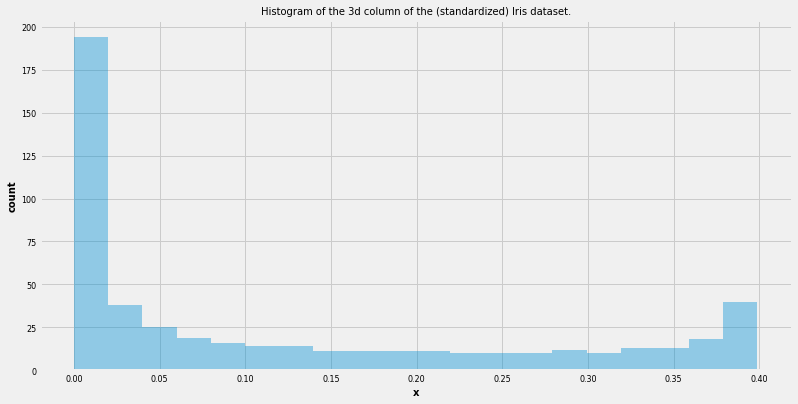

In [29]:
plt.figure(figsize=(12, 6))
plt.title('Histogram of the 3d column of the (standardized) Iris dataset.')
plt.xlabel('x')
plt.ylabel('count')
sns.distplot(y[:, 2], bins=20, kde=None)

In [ ]:
k = 35
m = pm.Model()
with m:
    alpha = pm.Gamma('alpha', 1, 1)
    beta = pm.Beta('beta', 1, alpha, shape=k)
    pi = pm.Deterministic('pi', stick_breaking(beta))

    tau = pm.Gamma('tau', 1, 1, shape=k) 
    lambda_ = pm.Uniform('lambda', 0, 1, shape=k)
    mu0 = pm.Uniform('mu0', -3, 3, shape=k)
    
    mu = pm.Normal('mu', mu=mu0, tau=1, shape=k)
    obs = pm.NormalMixture('obs', w=pi, mu=mu, tau=lambda_ * tau, observed=y[:, 2])


In [ ]:
plt.figure(figsize=(12, 6))
plt.title(r"Distribution of $\pi'$")
plt.bar(np.arange(k) + 1 - 0.5, trace['pi'].mean(axis=0), width=1., lw=0);
plt.xlim(0.5, k);
plt.xlabel('Component');
plt.ylabel('Posterior expected mixture weight');

In [ ]:
plt.figure(figsize=(12, 6))
plt.title('Density estimation with Dirichlet Processes')
plt.xlabel('x')
plt.ylabel('p(x)')
x = np.linspace(-3,  3, 100)
pi_mean = trace['pi'].mean(0)
mu_mean = trace['mu'].mean(0) 
mu0_mean = trace['mu0'].mean(0)
lambda_mean = trace['lambda'].mean(0)
tau_mean = trace['tau'].mean(0)
sd_mean = np.sqrt((1 / tau_mean * lambda_mean))
tau_sd = trace['mu'].std(0)
lambda_sd = trace['lambda'].std(0)
sd_sd = np.sqrt((1 / tau_sd * lambda_sd))

p = stats.norm.interval(0.05, trace['mu'].mean(0), trace['mu'].std(0))
psd = stats.norm.interval(0.05, sd_mean, sd_std)

a = 2
plt.fill_between(x, stats.norm.pdf(x, mu_mean[0], psd[0][0]) * pi_mean[0], stats.norm.pdf(x, mu_mean[0], psd[1][0]) * pi_mean[0])
plt.fill_between(x, stats.norm.pdf(x, mu_mean[1], psd[0][1]) * pi_mean[1], stats.norm.pdf(x, mu_mean[1], psd[1][1]) * pi_mean[1])
sns.distplot(y[:, 2], bins=20, kde=None, norm_hist=True, rug=True, )